# Pandas Introduction

Pandas is the de-facto python standar tool to perform data processing and analysis. The current version is v0.22.0 (see http://pandas.pydata.org/). 

You can install it by just running

    conda install pandas
    
In the following we will use both the official pandas documentation and the book "Numerical Python - A practical technique approach for Industry", from Robert Johansson, as the basis for this introduction.

We will also use the seaborn libray to generate plots that are pleasant and clear almost by default. Please install it.

## Starting with pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Series
A series is a convenient container for one-dimensional arrays, which can use descriptive name for indexing and allows for quick access to some descriptive statistics.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

s = pd.Series([909976, 8615246, 2872086, 2273305])
s

0     909976
1    8615246
2    2872086
3    2273305
dtype: int64

The indexes are, by default, of dtype int64. You can access them directly )and to the values) as follows

In [6]:
print(s.index)
print(s.values)

RangeIndex(start=0, stop=4, step=1)
[ 909976 8615246 2872086 2273305]


You can change the index to something more descriptive. In this case, those numbers represent the population on a given city, so it would be much more descriptive to use the city name as index:

In [8]:
s.index = ["Stockholm", "London", "Rome", "Paris"]
s.name = "Population"
print(s)

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64


And you can access to the data directly

In [10]:
print(s["London"])
print(s.Stockholm)

8615246
909976


You can use several indexes to generate a sub-series:

In [12]:
s[["Paris", "Rome"]]

Paris    2273305
Rome     2872086
Name: Population, dtype: int64

You can access basic statistics at a hand:

In [17]:
s.mean(), s.std(), s.median(), s.quantile(0.5)

(3667653.25, 3399048.5005155364, 2572695.5, 2572695.5)

In [18]:
s.describe()

count    4.000000e+00
mean     3.667653e+06
std      3.399049e+06
min      9.099760e+05
25%      1.932473e+06
50%      2.572696e+06
75%      4.307876e+06
max      8.615246e+06
Name: Population, dtype: float64

And you can also plot easily, 

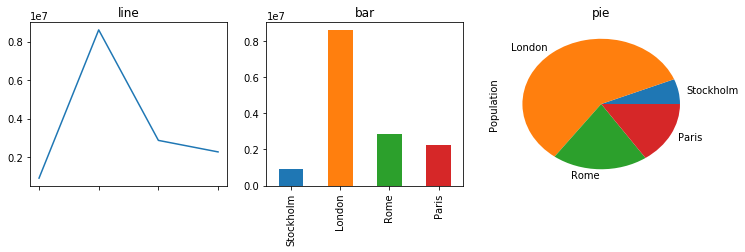

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
s.plot(ax=axes[0], kind='line', title='line')
s.plot(ax=axes[1], kind='bar', title='bar')
s.plot(ax=axes[2], kind='pie', title='pie')

## Dataframe
The dataframe is the most important object inside pandas. It allows to represent, access, process, etc multi-dimensional data. 

You can initialize a dataframe in several ways. For example, you can use a dictionary or a nested list. For example, you can do something like

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame([[909976, "Sweden"],
                   [8615246, "United Kingdom"],
                   [2872086, "Italy"],
                   [2273305, "France"]])
df

,0,1
0,909976,Sweden
1,8615246,United Kingdom
2,2872086,Italy
3,2273305,France


In [23]:
df.index = ["Stockholm", "London", "Rome", "Paris"]
df.columns = ["Population", "State"]
df

,Population,State
Stockholm,909976,Sweden
London,8615246,United Kingdom
Rome,2872086,Italy
Paris,2273305,France


In [24]:
df.Population

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [25]:
df.State

Stockholm            Sweden
London       United Kingdom
Rome                  Italy
Paris                France
Name: State, dtype: object

You can access a specific column using the `loc` method, which produces a series object (previously you could use `ix` but it is now deprecated. Now use `.loc` or `iloc`)

In [29]:
df.loc[["London", "Paris"]] # This produces another data frame

,Population,State
London,8615246,United Kingdom
Paris,2273305,France


In [30]:
df.loc[["London", "Paris"], "Population"] # This produces another data frame, and acces a specific column

London    8615246
Paris     2273305
Name: Population, dtype: int64

## Reading a huge csv into a dataframe
Download the population for many european cities from the url: https://en.wikipedia.org/wiki/List_of_cities_in_the_European_Union_by_population_within_city_limits or directly from https://raw.githubusercontent.com/jrjohansson/numerical-python-book-code/master/european_cities.csv
        

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("european_cities.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
Rank                       105 non-null int64
City                       105 non-null object
State                      105 non-null object
Population                 105 non-null object
Date of census/estimate    105 non-null object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


In [2]:
df.head()

,Rank,City,State,Population,Date of census/estimate
0,1,London[2],United Kingdom,"8,615,246",1 June 2014
1,2,Berlin,Germany,"3,437,916",31 May 2014
2,3,Madrid,Spain,"3,165,235",1 January 2014
3,4,Rome,Italy,"2,872,086",30 September 2014
4,5,Paris,France,"2,273,305",1 January 2013


In [33]:
df.tail()

,Rank,City,State,Population,Date of census/estimate
100,101,Bonn,Germany,"309,869",31 December 2012
101,102,Malmö,Sweden,"309,105",31 March 2013
102,103,Nottingham,United Kingdom,"308,735",30 June 2012
103,104,Katowice,Poland,"308,269",30 June 2012
104,105,Kaunas,Lithuania,"306,888",1 January 2013


### Processing info
Let's say that you want to have the population as integers. You will need to extract the population , to replace the ',' and to cast the values to integers. You could use the `apply` method to do that 

In [3]:
df['Numeric Population'] = df.Population.apply(lambda x: int(x.replace(',', ''))) # create a new column
df.head()

,Rank,City,State,Population,Date of census/estimate,Numeric Population
0,1,London[2],United Kingdom,"8,615,246",1 June 2014,8615246
1,2,Berlin,Germany,"3,437,916",31 May 2014,3437916
2,3,Madrid,Spain,"3,165,235",1 January 2014,3165235
3,4,Rome,Italy,"2,872,086",30 September 2014,2872086
4,5,Paris,France,"2,273,305",1 January 2013,2273305


In [5]:
df.dtypes

Rank                        int64
City                       object
State                      object
Population                 object
Date of census/estimate    object
Numeric Population          int64
dtype: object

In [4]:
print(df["State"].values[:3])
df["State"] = df["State"].apply(lambda x: x.strip())
df.head()

[' United Kingdom' ' Germany' ' Spain']


,Rank,City,State,Population,Date of census/estimate,Numeric Population
0,1,London[2],United Kingdom,"8,615,246",1 June 2014,8615246
1,2,Berlin,Germany,"3,437,916",31 May 2014,3437916
2,3,Madrid,Spain,"3,165,235",1 January 2014,3165235
3,4,Rome,Italy,"2,872,086",30 September 2014,2872086
4,5,Paris,France,"2,273,305",1 January 2013,2273305


You can also change the index,

In [6]:
df2 = df.set_index("City")
df2 = df2.sort_index()
df2.head()

,Rank,State,Population,Date of census/estimate,Numeric Population
City,,,,,
Aarhus,92,Denmark,"326,676",1 October 2014,326676
Alicante,86,Spain,"334,678",1 January 2012,334678
Amsterdam,23,Netherlands,"813,562",31 May 2014,813562
Antwerp,59,Belgium,"510,610",1 January 2014,510610
Athens,34,Greece,"664,046",24 May 2011,664046


In [10]:
df3 = df.set_index(["State", "City"]).sort_index(0)
df3.head(7)

Rank Population Date of census/estimate  \
State    City                                                    
Austria  Vienna           7  1,794,770          1 January 2015   
Belgium  Antwerp         59    510,610          1 January 2014   
         Brussels[17]    16  1,175,831          1 January 2014   
Bulgaria Plovdiv         84    341,041        31 December 2013   
         Sofia           14  1,291,895        14 December 2014   
         Varna           85    335,819        31 December 2013   
Croatia  Zagreb          24    790,017           31 March 2011   

                       Numeric Population  
State    City                              
Austria  Vienna                   1794770  
Belgium  Antwerp                   510610  
         Brussels[17]             1175831  
Bulgaria Plovdiv                   341041  
         Sofia                    1291895  
         Varna                     335819  
Croatia  Zagreb                    790017

In [11]:
df3.loc["Sweden"]

,Rank,Population,Date of census/estimate,Numeric Population
City,,,,
Gothenburg,53,"528,014",31 March 2013,528014
Malmö,102,"309,105",31 March 2013,309105
Stockholm,20,"909,976",31 January 2014,909976


In [23]:
df3.loc["Sweden"].sort_values("Numeric Population") # Sort by another column

,Rank,Population,Date of census/estimate,Numeric Population
City,,,,
Malmö,102,"309,105",31 March 2013,309105
Gothenburg,53,"528,014",31 March 2013,528014
Stockholm,20,"909,976",31 January 2014,909976


You can count the categorical data:

In [25]:
city_counts = df.State.value_counts()
city_counts.head()

Germany           19
United Kingdom    16
Spain             13
Poland            10
Italy             10
Name: State, dtype: int64

**Exercise: ** How large the total population of all cities within a state? Hint: Use the sum function

In [31]:
# extract the data indexed by state abd city
dfaux = df[["State", "City", "Numeric Population"]].set_index(["State", "City"])
dfaux = dfaux.sum(level="State")
dfaux.head(5)

,Numeric Population
State,
United Kingdom,16011877
Germany,15119548
Spain,10041639
Italy,8764067
France,4395271


In [38]:
# Or you can use the groupby method
dfaux = df.groupby("State").sum().sort_values("Numeric Population", ascending=False)
dfaux.head(5)

,Rank,Numeric Population
State,,
United Kingdom,989,16011877
Germany,918,15119548
Spain,714,10041639
Italy,472,8764067
Poland,545,6267409


In [39]:
dfaux.head(5).drop("Rank", axis=1)

,Numeric Population
State,
United Kingdom,16011877
Germany,15119548
Spain,10041639
Italy,8764067
Poland,6267409


We can also plot

Text(0.5,0,'Total pop. in top 105 cities')

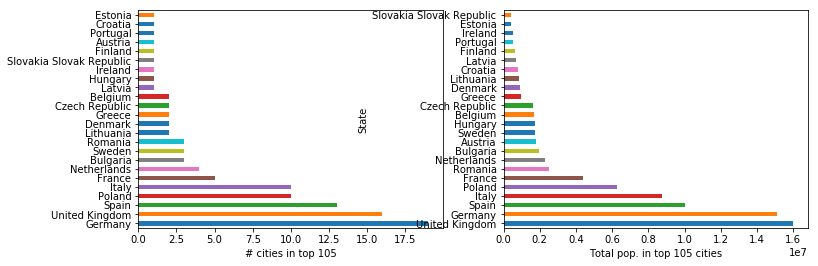

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
city_counts.plot(kind='barh', ax=ax1)
ax1.set_xlabel("# cities in top 105")
dfaux["Numeric Population"].plot(kind='barh', ax=ax2)
ax2.set_xlabel("Total pop. in top 105 cities")

### Date series and data frames

In [47]:
dates = pd.date_range('20130101', periods=6)
print(dates)
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
print(df)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
                   A         B         C         D
2013-01-01  0.357996 -0.307430  0.028002 -0.488149
2013-01-02  1.486650 -0.797481  0.567530 -0.873839
2013-01-03 -1.543271 -0.925929 -0.693424 -1.172655
2013-01-04 -0.247690 -0.430447  1.766557  2.487902
2013-01-05 -1.038383  1.799740 -1.196389 -1.532387
2013-01-06 -1.026121 -0.220385  0.284389  1.239374


In [48]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.488149,0.028002,-0.307430,0.357996
2013-01-02,-0.873839,0.567530,-0.797481,1.486650
2013-01-03,-1.172655,-0.693424,-0.925929,-1.543271
2013-01-04,2.487902,1.766557,-0.430447,-0.247690
2013-01-05,-1.532387,-1.196389,1.799740,-1.038383
2013-01-06,1.239374,0.284389,-0.220385,-1.026121


In [49]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.357996,-0.307430,0.028002,-0.488149
2013-01-02,1.486650,-0.797481,0.567530,-0.873839


In [50]:
df[df > 0]

,A,B,C,D
2013-01-01,0.357996,NaN,0.028002,NaN
2013-01-02,1.486650,NaN,0.567530,NaN
2013-01-03,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,1.766557,2.487902
2013-01-05,NaN,1.79974,NaN,NaN
2013-01-06,NaN,NaN,0.284389,1.239374


In [51]:
df[df > 0].fillna(value=5)

,A,B,C,D
2013-01-01,0.357996,5.00000,0.028002,5.000000
2013-01-02,1.486650,5.00000,0.567530,5.000000
2013-01-03,5.000000,5.00000,5.000000,5.000000
2013-01-04,5.000000,5.00000,1.766557,2.487902
2013-01-05,5.000000,1.79974,5.000000,5.000000
2013-01-06,5.000000,5.00000,0.284389,1.239374


## Exercises

From : https://www.w3resource.com/python-exercises/pandas/index.php , https://github.com/ajcr/100-pandas-puzzles/blob/master/100-pandas-puzzles.ipynb , https://github.com/guipsamora/pandas_exercises

1. Write a Python program to create and display a DataFrame from a specified dictionary data which has the index labels.

    - `exam_data = {'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew',   'Laura', 'Kevin', 'Jonas']`,
    `'score': [12.5, 9, 16.5, np.nan, 9, 20, 14.5, np.nan, 8, 19],`
    `'attempts': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],`
    `'qualify': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes']}`
    - `labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']`
    
2. Print the `name` and `score` of the previous dataframe.

3. Plot the socoreper student using matplotlib and seaborn.

4. Show the students with tries larger or equal than 2.

5. Compute the average examination attemps.

6. Save the previous dataframe onto a csv and verify.

7. Save the previous dictionary onto an escel file and verify.

6. Solve the even exercises on https://github.com/ajcr/100-pandas-puzzles/blob/master/100-pandas-puzzles.ipynb 

# Seaborn library
The seaborn graphics library is built on top of matplotlib but tends to produce better default graphics specially when performing data analysis and visualization. Let's see some examples. Find the documentation at https://seaborn.pydata.org/index.html . See some examples at https://seaborn.pydata.org/examples/index.html .

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

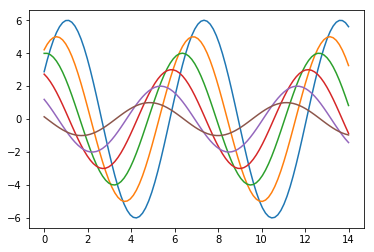

In [3]:
sinplot()

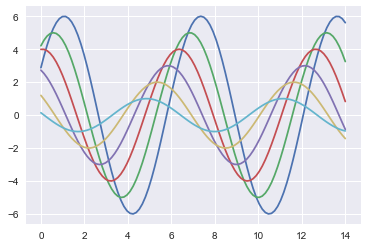

In [7]:
sns.set()
sinplot()

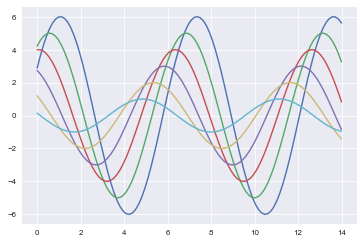

In [21]:
sns.set_style("darkgrid")
sns.set_context("paper")
sinplot()

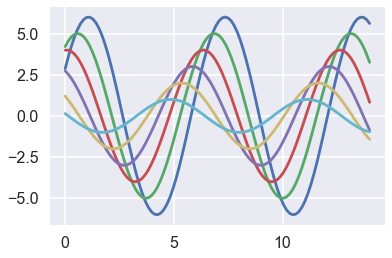

In [22]:
sns.set_context("poster")
sinplot()

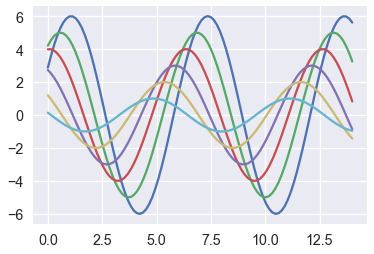

In [23]:
sns.set_context("talk", font_scale=1.1)
sinplot()

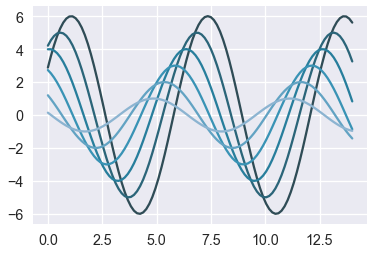

In [29]:
with sns.color_palette("PuBuGn_d"):
    sinplot()

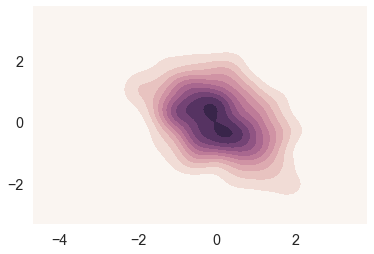

In [27]:
sns.set_context("talk", font_scale=1.1)
x, y = np.random.multivariate_normal([0, 0], [[1, -.5], [-.5, 1]], size=300).T
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.kdeplot(x, y, cmap=cmap, shade=True);

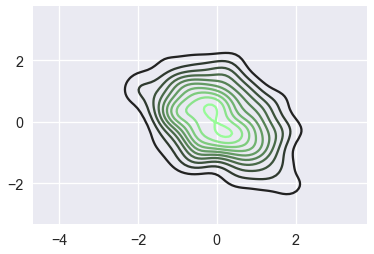

In [28]:
pal = sns.dark_palette("palegreen", as_cmap=True)
sns.kdeplot(x, y, cmap=pal);



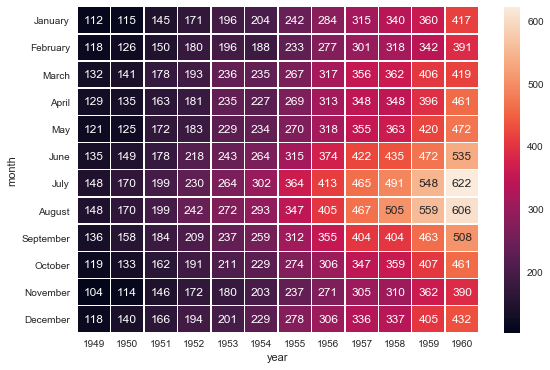

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

**Exercise:** Visualize the cities population data usaing seaborn